In [2]:
!pip install split-folders

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
import cv2

from PIL import Image, ImageOps
import scipy.ndimage as ndi

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

import splitfolders

In [4]:
os.listdir(r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET')

['Cyst', 'Normal', 'Stone', 'Tumor']

In [5]:
path_main = r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET'
for folder in os.listdir(path_main):
    list_of_elements = os.listdir(os.path.join(path_main, folder)) 
    print(f'Folder: {folder}\n')
    print(f'Number of elements: {len(list_of_elements)}\n')
    #print(f'First item\'s name: {list_of_elements[0]}\n')
    print('***************************')

Folder: Cyst

Number of elements: 1000

***************************
Folder: Normal

Number of elements: 1000

***************************
Folder: Stone

Number of elements: 1000

***************************
Folder: Tumor

Number of elements: 1000

***************************


In [6]:
def plot_imgs(item_dir, num_imgs=25):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)

    plt.tight_layout()

In [7]:
path_normal = r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET\Normal'
path_stone = r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET\Stone'
path_cyst = r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET\Cyst'
path_tumor = r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET\Tumor'


In [8]:
splitfolders.ratio(
    r'C:\Users\Admin\Desktop\KIDNEY-DATASET\KIDNEY-DATASET',
   output=r"C:\Users\Admin\Desktop\KIDNEY-DATASET",
   seed=7,
   ratio=(0.8,0.2)
)

Copying files: 4000 files [00:32, 123.81 files/s]


In [9]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [10]:
train_dataset = train_datagen.flow_from_directory(r'C:\Users\Admin\Desktop\KIDNEY-DATASET\train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale', 
                                                  class_mode='categorical', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory(r'C:\Users\Admin\Desktop\KIDNEY-DATASET\test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [12]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train_dataset.image_shape), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
 
])

In [14]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 13)

Epoch 1/13
3/3 [==============================] - 55s 16s/step - loss: 1.4167 - accuracy: 0.2867 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/13
3/3 [==============================] - 34s 10s/step - loss: 1.3779 - accuracy: 0.2633 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/13
3/3 [==============================] - 32s 10s/step - loss: 1.3957 - accuracy: 0.3767 - precision: 0.2903 - recall: 0.0600  
Epoch 4/13
3/3 [==============================] - 29s 9s/step - loss: 1.3693 - accuracy: 0.4133 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/13
3/3 [==============================] - 31s 9s/step - loss: 1.3002 - accuracy: 0.4067 - precision: 0.5610 - recall: 0.0767   
Epoch 6/13
3/3 [==============================] - 37s 13s/step - loss: 1.3909 - accuracy: 0.3300 - precision: 0.2716 - recall: 0.0733
Epoch 7/13
3/3 [==============================] - 32s 10s/step - loss: 1.1833 - accuracy: 0.5900 - precision: 0.7297 - recall: 0.0900   
Epoch 8/13
3/3 [================

In [17]:
model.save('my_model.h5')

In [18]:
model = tf.keras.models.load_model('my_model.h5')
vgg_preds = model.predict(test_dataset)

8/8 [==============================] - 22s 3s/step


In [19]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
    diseases_labels.append(key)

In [20]:
def evaluate(actual, vgg_preds):
    
    
    pre = []
    for i in vgg_preds:
        pre.append(np.argmax(i))

    accuracy = (pre == actual).sum() / actual.shape[0]
    print(f'Accuracy: {accuracy}')

    precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')

    fig, ax = plt.subplots(figsize=(5,5))
    conf_mat = confusion_matrix(actual, pre)
    sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
    plt.show()

Accuracy: 0.80875
Precision: 0.8261843654465835
Recall: 0.8087500000000001
F1_score: 0.7825078231481891


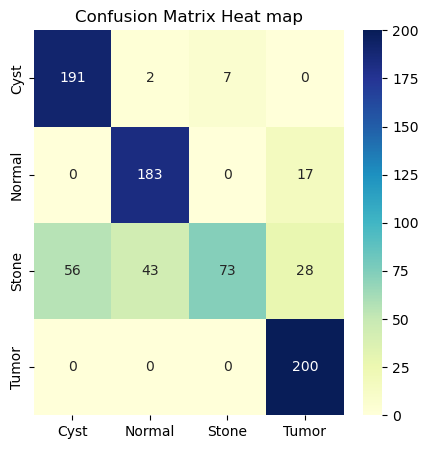

In [21]:
evaluate(test_dataset.classes,vgg_preds)